In [50]:
from keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Rescaling
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [51]:
TRAIN_DIR = r'C:\Users\Admin\Downloads\ML\ML_LABS\hotdog_nothotdog\train'
VAL_DIR = r'C:\Users\Admin\Downloads\ML\ML_LABS\hotdog_nothotdog\val'
#check my dir
print(f"files in current directory:{os.listdir(TRAIN_DIR)}")
print(f"files in current directory:{os.listdir(VAL_DIR)}")

files in current directory:['hotdog', 'not_hotdog']
files in current directory:['hotdog', 'not_hotdog']


In [52]:
train_hotdog_dir = os.path.join(TRAIN_DIR, 'hotdog')
train_not_hotdog_dir = os.path.join(TRAIN_DIR, 'not_hotdog')

train_hotdog_names = os.listdir(train_hotdog_dir)
train_not_hotdog_names = os.listdir(train_not_hotdog_dir)
print(f"This is 5 files in hotdog subdir: {train_hotdog_names[:5]} and 5 files in not hotdog subdir:{train_not_hotdog_names[:5]}")

This is 5 files in hotdog subdir: ['10020170.jpg', '10397836.jpg', '11161358.jpg', '11306883.jpg', '11370057.jpg'] and 5 files in not hotdog subdir:['1001773.jpg', '1028599.jpg', '1059905.jpg', '1059943.jpg', '106343.jpg']


In [53]:
val_hotdog_dir = os.path.join(VAL_DIR, 'hotdog')
val_not_hotdog_dir = os.path.join(VAL_DIR, 'not_hotdog')

val_hotdog_names = os.listdir(val_hotdog_dir)
val_not_hotdog_names = os.listdir(val_not_hotdog_dir)
print(f"This is 5 files in hotdog subdir: {val_hotdog_names[:5]} and 5 files in not hotdog subdir:{val_not_hotdog_names[:5]}")

This is 5 files in hotdog subdir: ['13355622.jpg', '13684067.jpg', '14007235.jpg', '15634638.jpg', '16121289.jpg'] and 5 files in not hotdog subdir:['1775043.jpg', '1860204.jpg', '1860208.jpg', '1893556.jpg', '1907244.jpg']


In [54]:
print(f"total training hotdog images: {len(os.listdir(train_hotdog_dir))}")
print(f"total training not hotdog images: {len(os.listdir(train_hotdog_dir))}")

total training hotdog images: 100
total training not hotdog images: 100


In [55]:
print(f"total validating hotdog images: {len(os.listdir(val_hotdog_dir))}")
print(f"total validating not hotdog images: {len(os.listdir(val_hotdog_dir))}")

total validating hotdog images: 25
total validating not hotdog images: 25


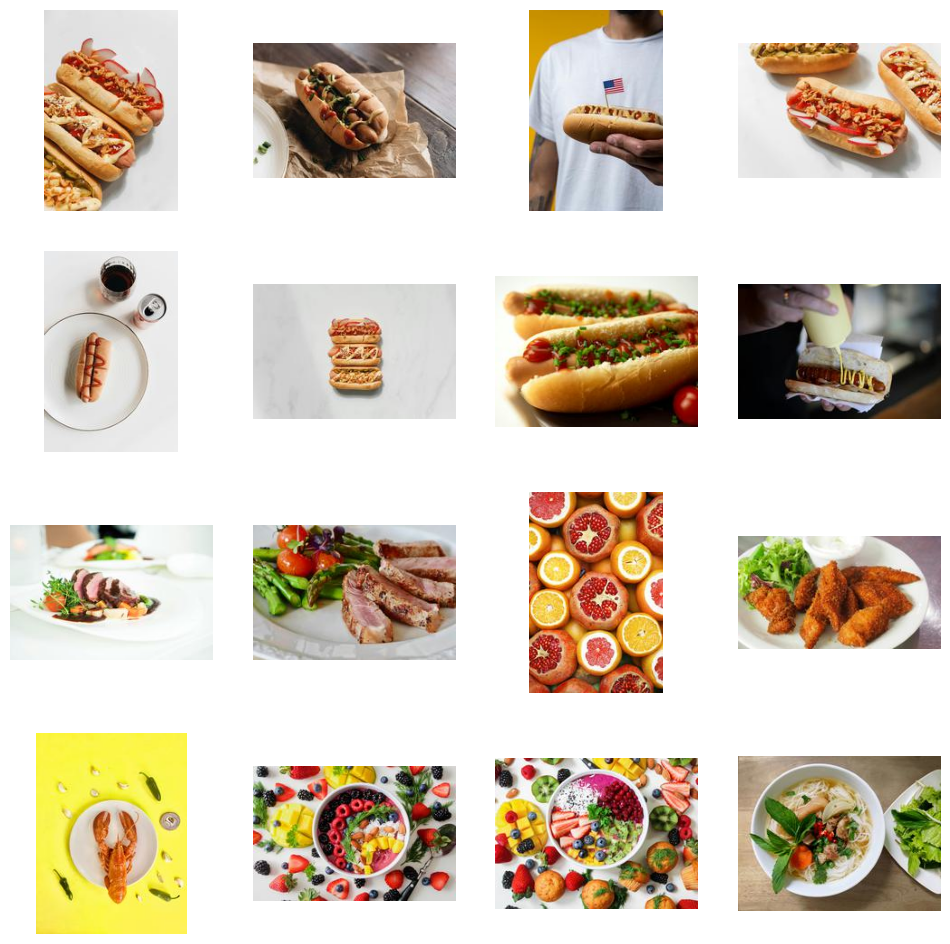

In [56]:
nrow, ncol = 4, 4
fig = plt.gcf()
fig.set_size_inches(ncol * 3, nrow *3)

next_hotdog = [os.path.join(train_hotdog_dir, fname) for fname in random.sample(train_hotdog_names, k=8)]
next_not_hotdog = [os.path.join(train_not_hotdog_dir, fname) for fname in random.sample(train_not_hotdog_names, k=8)]

for i, img_path in enumerate(next_hotdog + next_not_hotdog):
    sp = plt.subplot(nrow, ncol, i + 1)
    sp.axis("Off")

    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()


In [57]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(TRAIN_DIR,target_size=(150,150), batch_size=32, class_mode='binary')
validation_generator = datagen.flow_from_directory(VAL_DIR,target_size=(150,150), batch_size=32, class_mode='binary')

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [58]:
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=validation_generator, verbose=2)


Epoch 1/10
7/7 - 2s - loss: 5.7967 - accuracy: 0.5400 - val_loss: 2.1620 - val_accuracy: 0.5000 - 2s/epoch - 335ms/step
Epoch 2/10
7/7 - 0s - loss: 1.0154 - accuracy: 0.4850 - val_loss: 0.6964 - val_accuracy: 0.4600 - 254ms/epoch - 36ms/step
Epoch 3/10
7/7 - 0s - loss: 0.6733 - accuracy: 0.6000 - val_loss: 0.7024 - val_accuracy: 0.4400 - 253ms/epoch - 36ms/step
Epoch 4/10
7/7 - 0s - loss: 0.6054 - accuracy: 0.7900 - val_loss: 0.6996 - val_accuracy: 0.5800 - 245ms/epoch - 35ms/step
Epoch 5/10
7/7 - 0s - loss: 0.4953 - accuracy: 0.7650 - val_loss: 0.7340 - val_accuracy: 0.4400 - 251ms/epoch - 36ms/step
Epoch 6/10
7/7 - 0s - loss: 0.3778 - accuracy: 0.8800 - val_loss: 0.7686 - val_accuracy: 0.5200 - 257ms/epoch - 37ms/step
Epoch 7/10
7/7 - 0s - loss: 0.2780 - accuracy: 0.9350 - val_loss: 0.7563 - val_accuracy: 0.5800 - 257ms/epoch - 37ms/step
Epoch 8/10
7/7 - 0s - loss: 0.1594 - accuracy: 0.9700 - val_loss: 0.9301 - val_accuracy: 0.4800 - 275ms/epoch - 39ms/step
Epoch 9/10
7/7 - 0s - loss

1/1 [==============================] - 0s 16ms/step


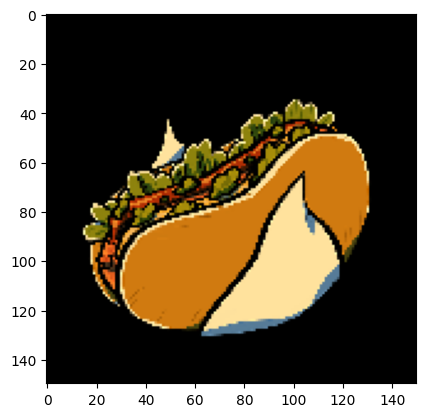

It's hotdog bro :)


In [73]:

def is_hot_dog(img_path):
    img = image.load_img(img_path, target_size=(150,150,3))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    plt.imshow(img)
    plt.show()
    return "It's hotdog bro :)" if prediction[0][0] > 0.5 else "Not Hotdog :/"
print(is_hot_dog(r'C:\Users\Admin\Downloads\ML\ML_LABS\hotdog_nothotdog\test\hot-dog-6922269_640.png'))
